In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataframe = pd.read_csv("\Sixth Semester\Data Analysis and Visualization\Class\Project\CarsData.csv")

# Select only numerical columns for KNN
numerical_cols = dataframe.select_dtypes(include=['number']).columns

In [2]:
from sklearn.model_selection import train_test_split

# Handle missing values
dataframe = dataframe.dropna()

# Split the dataset into features and target variable
X = dataframe[numerical_cols].drop('price', axis=1)  # Replace 'target_column' with your target column name
y = dataframe['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate KNN regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 12801259.39163281
R-squared: 0.8685002174584934


In [5]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to try
k_values = range(1, 21)

# Create a parameter grid
param_grid = {'n_neighbors': k_values}

# Instantiate the grid search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_best = best_model.predict(X_test_scaled)

# Calculate and print the mean squared error with the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error with best model:", mse_best)

# Calculate and print the R-squared value with the best model
r2_best = r2_score(y_test, y_pred_best)
print("R-squared with best model:", r2_best)

Best k value: 5
Mean Squared Error with best model: 12801259.39163281
R-squared with best model: 0.8685002174584934


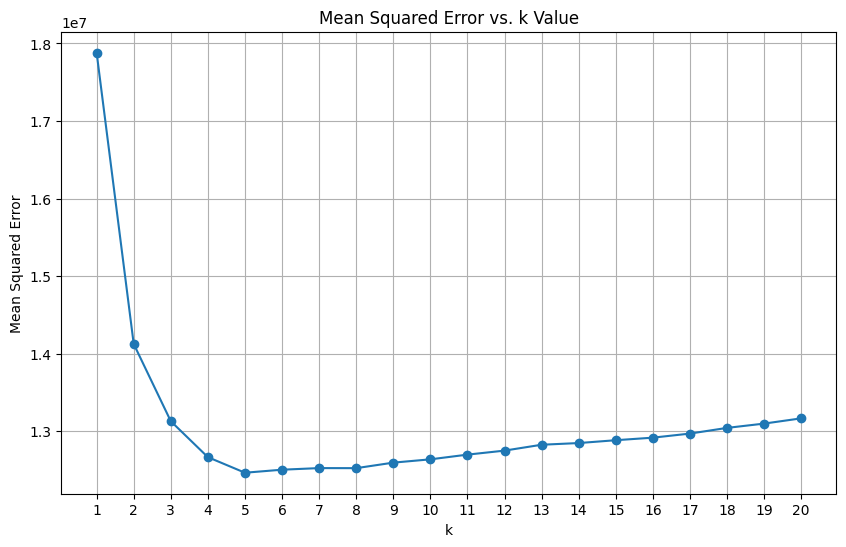

In [6]:
# Extract mean squared error for each value of k
mse_values = -grid_search.cv_results_['mean_test_score']

# Plot mean squared error for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. k Value')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

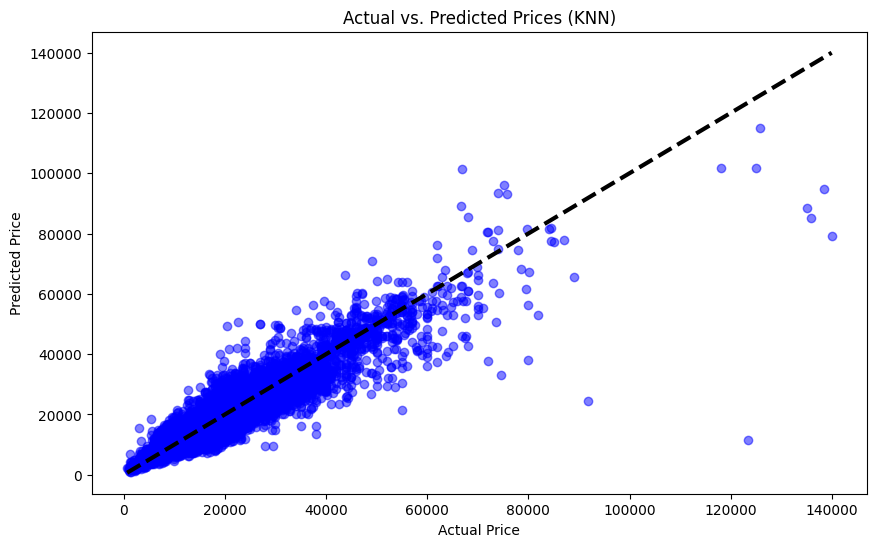

In [7]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (KNN)')
plt.show()

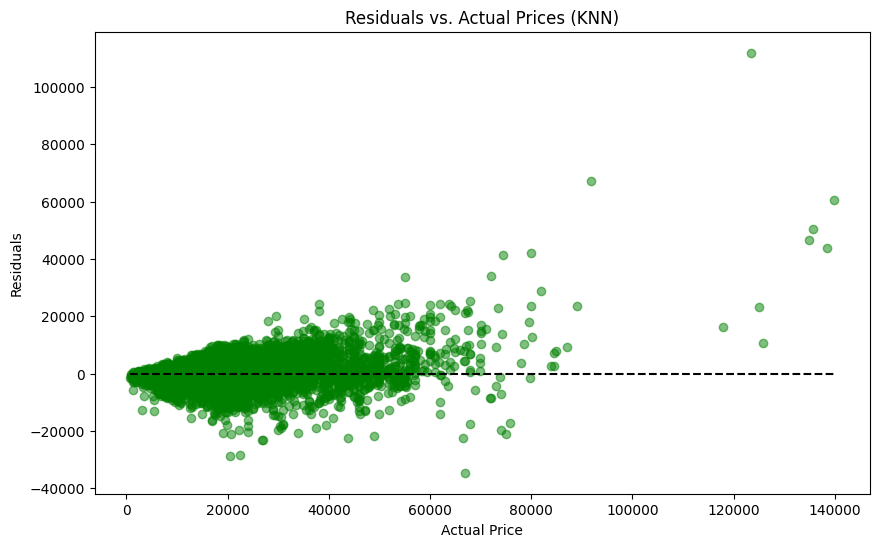

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Prices (KNN)')
plt.show()